Daily MK(Maeil Economy) Wordcloud

In [211]:
#pip install pytimekr
#pip install wordcloud
#pip install nltk
#pip install konlpy

Importing Basic Library

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import urllib.parse
import re
import requests as req
import datetime
import time
import seaborn as sns
import matplotlib as mpl
from bs4 import BeautifulSoup as bs 
from PIL import Image as MImage
from IPython.display import Image
from matplotlib import rc
from matplotlib import font_manager
from tqdm import tqdm # for문 진행상황 눈으로 확인 (loading bar)
from datetime import date
from pytimekr import pytimekr
from wordcloud import WordCloud,ImageColorGenerator
from collections import Counter

plt.rc('font', family='NanumGothicBold')

mpl.rc('axes', unicode_minus=False)

Natrual Language as stopwords and word/sentence token

In [213]:
# 명사 추출
import nltk
#nltk.download('averaged_perceptron_tagger')

# 영어 불용어(stopwords) 사전
#nltk.download('stopwords')
from nltk.corpus import stopwords    
stopwords = set(stopwords.words('English')) 

# 단어/문장 단위로 토큰화
#nltk.download('punkt')
from nltk.tokenize import word_tokenize,sent_tokenize

In [214]:
from konlpy.tag import Kkma
kkma = Kkma() #Java download needed
from konlpy.tag import Okt


In [215]:
from time import sleep
from tqdm import tqdm
for i in tqdm(range(10)):
    sleep(3)

100%|███████████████████████████████████████████| 10/10 [00:30<00:00,  3.01s/it]


Getting today's date, putting in to the line

In [216]:
day = datetime.date.today() 
today = day.strftime("%Y/%m/%d")
today_url = 'https://www.mk.co.kr/today-paper/01/'+today+'/'
    
print(day)
print(today_url)
    

2023-01-26
https://www.mk.co.kr/today-paper/01/2023/01/26/


In [217]:
url = today_url
response=urllib.request.urlopen(url)
soup=bs(response,'html.parser')

Checking if it's right

In [218]:
html = soup.select('dd.news_tt.first > a') # 원하는 부분의 CSS 선택자 지정
html[2] # 리스트의 3번째 요소 내용 확인

<a class="nclicks(cls_eco.clsart1)" href="https://www.mk.co.kr/today-paper/view/2023/5369569/">'연금개혁 거짓말' 끝낸 日 … 백년 뒤에도 걱정없다</a>

Fetching Title

In [219]:
title = [x.text for x in html]
print(title)

['"배달로 다 떠났어요" 멈춰선 소부장', '파운드리 나노기술 경쟁 韓·대만 격전에 日 참전', "'연금개혁 거짓말' 끝낸 日 … 백년 뒤에도 걱정없다", "중국發 '혐한 사이버테러' 현실로", '나경원, 결국 "불출마" 與 당권 金·安 대결로', "가상세계 넘보는 K팝 …'비장의 카드' AI가수 출격", '같은 서울인데 소득 2.5배 … 강남구 7469만원·강북구 2953만원', '[표] 시세', '"3나노 건너뛰고 2나노"… 日반도체연합, 삼성전자를 겨눴다', 'D램도 더 빠르게, 더 효율적으로 절대강자 삼성에 2·3위 맹추격', "청년 사라지는 한국 … 취업자증가율 2040년 'OECD 꼴찌'", '고용쇼크 이미 시작 … 호황 돌아와도 취업자수 줄어든다', '"직원없어 공장 증설 포기 … 일당 19만원 불체자도 감지덕지"', '원가 치솟고 이자 부담 눈덩이 … 경매 나온 공장 석달새 700개', '선거참패 불사한 日연금개혁 … 20년 지난 지금, 누구나 "옳았다"', '"선물·스타트업까지 투자 확대 … 100년 내다보고 운용"', '장고 끝 친윤·비윤 다 놓친 나경원 … 정치생명 최대 위기', '檢출석 앞둔 이재명에 … 野강경파 "더 강하게 나가야"', '난방비 폭탄에 … 野 "尹정부탓" 與 "文 탈원전탓"', '김기현·안철수, 벼랑끝 싸움 … 羅 지지율 어디로', '尹 "규제·노동, 글로벌 스탠더드로"', '"평양 5일간 봉쇄령"… 北 코로나 재유행?', "美·獨 주력탱크 우크라 보낸다…전쟁 승기 잡을 '게임체인저'", '우군 급한 시진핑 "중남미는 동반자"', '美구인난 얼마나 심하길래 월마트도 최저시급 올렸다', "中비야디, 독일에 '유럽 교두보' 타진", '日 낮은 대출금리 영향에 도쿄 도심 집값 7% 급등', '"뉴스코프 주주들이 반대" 머독, 폭스와 합병 포기', '年3600만원 못버는 배달원 稅부담 줄어든다', '[단독] 고갈위기 8대 사회보험…2070년까지 재정추계', '노조 회계에 칼 빼든 고용부 시민단체 보조금도 전수조사', "'K푸드

In [220]:
len(title)

118

In [221]:
a=[]
for i in range(len(title)):
    text = soup.select('dd.news_tt.first > a')[i].text
    a.append(text)
print(a)

['"배달로 다 떠났어요" 멈춰선 소부장', '파운드리 나노기술 경쟁 韓·대만 격전에 日 참전', "'연금개혁 거짓말' 끝낸 日 … 백년 뒤에도 걱정없다", "중국發 '혐한 사이버테러' 현실로", '나경원, 결국 "불출마" 與 당권 金·安 대결로', "가상세계 넘보는 K팝 …'비장의 카드' AI가수 출격", '같은 서울인데 소득 2.5배 … 강남구 7469만원·강북구 2953만원', '[표] 시세', '"3나노 건너뛰고 2나노"… 日반도체연합, 삼성전자를 겨눴다', 'D램도 더 빠르게, 더 효율적으로 절대강자 삼성에 2·3위 맹추격', "청년 사라지는 한국 … 취업자증가율 2040년 'OECD 꼴찌'", '고용쇼크 이미 시작 … 호황 돌아와도 취업자수 줄어든다', '"직원없어 공장 증설 포기 … 일당 19만원 불체자도 감지덕지"', '원가 치솟고 이자 부담 눈덩이 … 경매 나온 공장 석달새 700개', '선거참패 불사한 日연금개혁 … 20년 지난 지금, 누구나 "옳았다"', '"선물·스타트업까지 투자 확대 … 100년 내다보고 운용"', '장고 끝 친윤·비윤 다 놓친 나경원 … 정치생명 최대 위기', '檢출석 앞둔 이재명에 … 野강경파 "더 강하게 나가야"', '난방비 폭탄에 … 野 "尹정부탓" 與 "文 탈원전탓"', '김기현·안철수, 벼랑끝 싸움 … 羅 지지율 어디로', '尹 "규제·노동, 글로벌 스탠더드로"', '"평양 5일간 봉쇄령"… 北 코로나 재유행?', "美·獨 주력탱크 우크라 보낸다…전쟁 승기 잡을 '게임체인저'", '우군 급한 시진핑 "중남미는 동반자"', '美구인난 얼마나 심하길래 월마트도 최저시급 올렸다', "中비야디, 독일에 '유럽 교두보' 타진", '日 낮은 대출금리 영향에 도쿄 도심 집값 7% 급등', '"뉴스코프 주주들이 반대" 머독, 폭스와 합병 포기', '年3600만원 못버는 배달원 稅부담 줄어든다', '[단독] 고갈위기 8대 사회보험…2070년까지 재정추계', '노조 회계에 칼 빼든 고용부 시민단체 보조금도 전수조사', "'K푸드

In [222]:
a

['"배달로 다 떠났어요" 멈춰선 소부장',
 '파운드리 나노기술 경쟁 韓·대만 격전에 日 참전',
 "'연금개혁 거짓말' 끝낸 日 … 백년 뒤에도 걱정없다",
 "중국發 '혐한 사이버테러' 현실로",
 '나경원, 결국 "불출마" 與 당권 金·安 대결로',
 "가상세계 넘보는 K팝 …'비장의 카드' AI가수 출격",
 '같은 서울인데 소득 2.5배 … 강남구 7469만원·강북구 2953만원',
 '[표] 시세',
 '"3나노 건너뛰고 2나노"… 日반도체연합, 삼성전자를 겨눴다',
 'D램도 더 빠르게, 더 효율적으로 절대강자 삼성에 2·3위 맹추격',
 "청년 사라지는 한국 … 취업자증가율 2040년 'OECD 꼴찌'",
 '고용쇼크 이미 시작 … 호황 돌아와도 취업자수 줄어든다',
 '"직원없어 공장 증설 포기 … 일당 19만원 불체자도 감지덕지"',
 '원가 치솟고 이자 부담 눈덩이 … 경매 나온 공장 석달새 700개',
 '선거참패 불사한 日연금개혁 … 20년 지난 지금, 누구나 "옳았다"',
 '"선물·스타트업까지 투자 확대 … 100년 내다보고 운용"',
 '장고 끝 친윤·비윤 다 놓친 나경원 … 정치생명 최대 위기',
 '檢출석 앞둔 이재명에 … 野강경파 "더 강하게 나가야"',
 '난방비 폭탄에 … 野 "尹정부탓" 與 "文 탈원전탓"',
 '김기현·안철수, 벼랑끝 싸움 … 羅 지지율 어디로',
 '尹 "규제·노동, 글로벌 스탠더드로"',
 '"평양 5일간 봉쇄령"… 北 코로나 재유행?',
 "美·獨 주력탱크 우크라 보낸다…전쟁 승기 잡을 '게임체인저'",
 '우군 급한 시진핑 "중남미는 동반자"',
 '美구인난 얼마나 심하길래 월마트도 최저시급 올렸다',
 "中비야디, 독일에 '유럽 교두보' 타진",
 '日 낮은 대출금리 영향에 도쿄 도심 집값 7% 급등',
 '"뉴스코프 주주들이 반대" 머독, 폭스와 합병 포기',
 '年3600만원 못버는 배달원 稅부담 줄어든다',
 '[단독] 고갈위기 8대 사회보험…2070년까지 재정추계',
 '노조 회계에 칼

Saving Newspaper Headers

In [223]:
kws = pd.DataFrame(a)
kws.to_csv(str(day)+' ''매경head.csv',header = ['제목'])

In [224]:
b=str(a)

In [225]:
print(type(b))

<class 'str'>


Filtering

In [226]:
b

'[\'"배달로 다 떠났어요" 멈춰선 소부장\', \'파운드리 나노기술 경쟁 韓·대만 격전에 日 참전\', "\'연금개혁 거짓말\' 끝낸 日 … 백년 뒤에도 걱정없다", "중국發 \'혐한 사이버테러\' 현실로", \'나경원, 결국 "불출마" 與 당권 金·安 대결로\', "가상세계 넘보는 K팝 …\'비장의 카드\' AI가수 출격", \'같은 서울인데 소득 2.5배 … 강남구 7469만원·강북구 2953만원\', \'[표] 시세\', \'"3나노 건너뛰고 2나노"… 日반도체연합, 삼성전자를 겨눴다\', \'D램도 더 빠르게, 더 효율적으로 절대강자 삼성에 2·3위 맹추격\', "청년 사라지는 한국 … 취업자증가율 2040년 \'OECD 꼴찌\'", \'고용쇼크 이미 시작 … 호황 돌아와도 취업자수 줄어든다\', \'"직원없어 공장 증설 포기 … 일당 19만원 불체자도 감지덕지"\', \'원가 치솟고 이자 부담 눈덩이 … 경매 나온 공장 석달새 700개\', \'선거참패 불사한 日연금개혁 … 20년 지난 지금, 누구나 "옳았다"\', \'"선물·스타트업까지 투자 확대 … 100년 내다보고 운용"\', \'장고 끝 친윤·비윤 다 놓친 나경원 … 정치생명 최대 위기\', \'檢출석 앞둔 이재명에 … 野강경파 "더 강하게 나가야"\', \'난방비 폭탄에 … 野 "尹정부탓" 與 "文 탈원전탓"\', \'김기현·안철수, 벼랑끝 싸움 … 羅 지지율 어디로\', \'尹 "규제·노동, 글로벌 스탠더드로"\', \'"평양 5일간 봉쇄령"… 北 코로나 재유행?\', "美·獨 주력탱크 우크라 보낸다…전쟁 승기 잡을 \'게임체인저\'", \'우군 급한 시진핑 "중남미는 동반자"\', \'美구인난 얼마나 심하길래 월마트도 최저시급 올렸다\', "中비야디, 독일에 \'유럽 교두보\' 타진", \'日 낮은 대출금리 영향에 도쿄 도심 집값 7% 급등\', \'"뉴스코프 주주들이 반대" 머독, 폭스와 합병 포기\', \'年3600만원 못버는 배달원 稅부담 줄어든다\', \'[단독] 고갈위기 8대

In [227]:
b_filtered = b.replace('\n','').replace('\u200b','')
b_filtered

'[\'"배달로 다 떠났어요" 멈춰선 소부장\', \'파운드리 나노기술 경쟁 韓·대만 격전에 日 참전\', "\'연금개혁 거짓말\' 끝낸 日 … 백년 뒤에도 걱정없다", "중국發 \'혐한 사이버테러\' 현실로", \'나경원, 결국 "불출마" 與 당권 金·安 대결로\', "가상세계 넘보는 K팝 …\'비장의 카드\' AI가수 출격", \'같은 서울인데 소득 2.5배 … 강남구 7469만원·강북구 2953만원\', \'[표] 시세\', \'"3나노 건너뛰고 2나노"… 日반도체연합, 삼성전자를 겨눴다\', \'D램도 더 빠르게, 더 효율적으로 절대강자 삼성에 2·3위 맹추격\', "청년 사라지는 한국 … 취업자증가율 2040년 \'OECD 꼴찌\'", \'고용쇼크 이미 시작 … 호황 돌아와도 취업자수 줄어든다\', \'"직원없어 공장 증설 포기 … 일당 19만원 불체자도 감지덕지"\', \'원가 치솟고 이자 부담 눈덩이 … 경매 나온 공장 석달새 700개\', \'선거참패 불사한 日연금개혁 … 20년 지난 지금, 누구나 "옳았다"\', \'"선물·스타트업까지 투자 확대 … 100년 내다보고 운용"\', \'장고 끝 친윤·비윤 다 놓친 나경원 … 정치생명 최대 위기\', \'檢출석 앞둔 이재명에 … 野강경파 "더 강하게 나가야"\', \'난방비 폭탄에 … 野 "尹정부탓" 與 "文 탈원전탓"\', \'김기현·안철수, 벼랑끝 싸움 … 羅 지지율 어디로\', \'尹 "규제·노동, 글로벌 스탠더드로"\', \'"평양 5일간 봉쇄령"… 北 코로나 재유행?\', "美·獨 주력탱크 우크라 보낸다…전쟁 승기 잡을 \'게임체인저\'", \'우군 급한 시진핑 "중남미는 동반자"\', \'美구인난 얼마나 심하길래 월마트도 최저시급 올렸다\', "中비야디, 독일에 \'유럽 교두보\' 타진", \'日 낮은 대출금리 영향에 도쿄 도심 집값 7% 급등\', \'"뉴스코프 주주들이 반대" 머독, 폭스와 합병 포기\', \'年3600만원 못버는 배달원 稅부담 줄어든다\', \'[단독] 고갈위기 8대

In [228]:
pattern = r'\[.*?\]'
re.sub(pattern, '', b_filtered)

' 시세\', \'"3나노 건너뛰고 2나노"… 日반도체연합, 삼성전자를 겨눴다\', \'D램도 더 빠르게, 더 효율적으로 절대강자 삼성에 2·3위 맹추격\', "청년 사라지는 한국 … 취업자증가율 2040년 \'OECD 꼴찌\'", \'고용쇼크 이미 시작 … 호황 돌아와도 취업자수 줄어든다\', \'"직원없어 공장 증설 포기 … 일당 19만원 불체자도 감지덕지"\', \'원가 치솟고 이자 부담 눈덩이 … 경매 나온 공장 석달새 700개\', \'선거참패 불사한 日연금개혁 … 20년 지난 지금, 누구나 "옳았다"\', \'"선물·스타트업까지 투자 확대 … 100년 내다보고 운용"\', \'장고 끝 친윤·비윤 다 놓친 나경원 … 정치생명 최대 위기\', \'檢출석 앞둔 이재명에 … 野강경파 "더 강하게 나가야"\', \'난방비 폭탄에 … 野 "尹정부탓" 與 "文 탈원전탓"\', \'김기현·안철수, 벼랑끝 싸움 … 羅 지지율 어디로\', \'尹 "규제·노동, 글로벌 스탠더드로"\', \'"평양 5일간 봉쇄령"… 北 코로나 재유행?\', "美·獨 주력탱크 우크라 보낸다…전쟁 승기 잡을 \'게임체인저\'", \'우군 급한 시진핑 "중남미는 동반자"\', \'美구인난 얼마나 심하길래 월마트도 최저시급 올렸다\', "中비야디, 독일에 \'유럽 교두보\' 타진", \'日 낮은 대출금리 영향에 도쿄 도심 집값 7% 급등\', \'"뉴스코프 주주들이 반대" 머독, 폭스와 합병 포기\', \'年3600만원 못버는 배달원 稅부담 줄어든다\', \' 고갈위기 8대 사회보험…2070년까지 재정추계\', \'노조 회계에 칼 빼든 고용부 시민단체 보조금도 전수조사\', "\'K푸드 선봉장\' 해외 한식당 8곳 선정", "\'금값\'된 금", \'외부 vs 내부 … 우리금융 회장 경쟁 본격화\', \'은행 영업시간 원래대로 … 노조 반발에 아슬아슬\', \'車 보험 손해율 2년째 흑자 보험료 인하엔 영향 없을듯\', \'전세사기 피해자에 대출 4년 늘려준다\', \'임대인·무주택청년 대출한

In [229]:
b_filtered = re.sub(r'\[\[(?:[^\]|]*\|)?([^\]|]*)\]\]', r'\1', b_filtered)
b_filtered

'[\'"배달로 다 떠났어요" 멈춰선 소부장\', \'파운드리 나노기술 경쟁 韓·대만 격전에 日 참전\', "\'연금개혁 거짓말\' 끝낸 日 … 백년 뒤에도 걱정없다", "중국發 \'혐한 사이버테러\' 현실로", \'나경원, 결국 "불출마" 與 당권 金·安 대결로\', "가상세계 넘보는 K팝 …\'비장의 카드\' AI가수 출격", \'같은 서울인데 소득 2.5배 … 강남구 7469만원·강북구 2953만원\', \'[표] 시세\', \'"3나노 건너뛰고 2나노"… 日반도체연합, 삼성전자를 겨눴다\', \'D램도 더 빠르게, 더 효율적으로 절대강자 삼성에 2·3위 맹추격\', "청년 사라지는 한국 … 취업자증가율 2040년 \'OECD 꼴찌\'", \'고용쇼크 이미 시작 … 호황 돌아와도 취업자수 줄어든다\', \'"직원없어 공장 증설 포기 … 일당 19만원 불체자도 감지덕지"\', \'원가 치솟고 이자 부담 눈덩이 … 경매 나온 공장 석달새 700개\', \'선거참패 불사한 日연금개혁 … 20년 지난 지금, 누구나 "옳았다"\', \'"선물·스타트업까지 투자 확대 … 100년 내다보고 운용"\', \'장고 끝 친윤·비윤 다 놓친 나경원 … 정치생명 최대 위기\', \'檢출석 앞둔 이재명에 … 野강경파 "더 강하게 나가야"\', \'난방비 폭탄에 … 野 "尹정부탓" 與 "文 탈원전탓"\', \'김기현·안철수, 벼랑끝 싸움 … 羅 지지율 어디로\', \'尹 "규제·노동, 글로벌 스탠더드로"\', \'"평양 5일간 봉쇄령"… 北 코로나 재유행?\', "美·獨 주력탱크 우크라 보낸다…전쟁 승기 잡을 \'게임체인저\'", \'우군 급한 시진핑 "중남미는 동반자"\', \'美구인난 얼마나 심하길래 월마트도 최저시급 올렸다\', "中비야디, 독일에 \'유럽 교두보\' 타진", \'日 낮은 대출금리 영향에 도쿄 도심 집값 7% 급등\', \'"뉴스코프 주주들이 반대" 머독, 폭스와 합병 포기\', \'年3600만원 못버는 배달원 稅부담 줄어든다\', \'[단독] 고갈위기 8대

In [230]:
b_filtered = re.sub('\d',' ',b_filtered)
b_filtered

'[\'"배달로 다 떠났어요" 멈춰선 소부장\', \'파운드리 나노기술 경쟁 韓·대만 격전에 日 참전\', "\'연금개혁 거짓말\' 끝낸 日 … 백년 뒤에도 걱정없다", "중국發 \'혐한 사이버테러\' 현실로", \'나경원, 결국 "불출마" 與 당권 金·安 대결로\', "가상세계 넘보는 K팝 …\'비장의 카드\' AI가수 출격", \'같은 서울인데 소득  . 배 … 강남구     만원·강북구     만원\', \'[표] 시세\', \'" 나노 건너뛰고  나노"… 日반도체연합, 삼성전자를 겨눴다\', \'D램도 더 빠르게, 더 효율적으로 절대강자 삼성에  · 위 맹추격\', "청년 사라지는 한국 … 취업자증가율     년 \'OECD 꼴찌\'", \'고용쇼크 이미 시작 … 호황 돌아와도 취업자수 줄어든다\', \'"직원없어 공장 증설 포기 … 일당   만원 불체자도 감지덕지"\', \'원가 치솟고 이자 부담 눈덩이 … 경매 나온 공장 석달새    개\', \'선거참패 불사한 日연금개혁 …   년 지난 지금, 누구나 "옳았다"\', \'"선물·스타트업까지 투자 확대 …    년 내다보고 운용"\', \'장고 끝 친윤·비윤 다 놓친 나경원 … 정치생명 최대 위기\', \'檢출석 앞둔 이재명에 … 野강경파 "더 강하게 나가야"\', \'난방비 폭탄에 … 野 "尹정부탓" 與 "文 탈원전탓"\', \'김기현·안철수, 벼랑끝 싸움 … 羅 지지율 어디로\', \'尹 "규제·노동, 글로벌 스탠더드로"\', \'"평양  일간 봉쇄령"… 北 코로나 재유행?\', "美·獨 주력탱크 우크라 보낸다…전쟁 승기 잡을 \'게임체인저\'", \'우군 급한 시진핑 "중남미는 동반자"\', \'美구인난 얼마나 심하길래 월마트도 최저시급 올렸다\', "中비야디, 독일에 \'유럽 교두보\' 타진", \'日 낮은 대출금리 영향에 도쿄 도심 집값  % 급등\', \'"뉴스코프 주주들이 반대" 머독, 폭스와 합병 포기\', \'年    만원 못버는 배달원 稅부담 줄어든다\', \'[단독] 고갈위기  대

In [231]:
okt = Okt()  
okt.morphs(b_filtered)

['[\'"',
 '배달',
 '로',
 '다',
 '떠났어요',
 '"',
 '멈춰',
 '선',
 '소',
 '부장',
 "',",
 "'",
 '파운드리',
 '나노기술',
 '경쟁',
 '韓',
 '·',
 '대만',
 '격전',
 '에',
 '日',
 '참전',
 "',",
 '"\'',
 '연금',
 '개혁',
 '거짓말',
 "'",
 '끝낸',
 '日',
 '…',
 '백년',
 '뒤',
 '에도',
 '걱정',
 '없다',
 '",',
 '"',
 '중국',
 '發',
 "'",
 '혐한',
 '사이버테러',
 "'",
 '현실',
 '로',
 '",',
 "'",
 '나경원',
 ',',
 '결국',
 '"',
 '불',
 '출마',
 '"',
 '與',
 '당권',
 '金',
 '·',
 '安',
 '대결',
 '로',
 "',",
 '"',
 '가상세계',
 '넘',
 '보는',
 'K',
 '팝',
 "…'",
 '비장',
 '의',
 '카드',
 "'",
 'AI',
 '가수',
 '출격',
 '",',
 "'",
 '같은',
 '서울',
 '인데',
 '소득',
 '.',
 '배',
 '…',
 '강남구',
 '만원',
 '·',
 '강북구',
 '만원',
 "',",
 "'[",
 '표',
 ']',
 '시세',
 "',",
 '\'"',
 '나노',
 '건너',
 '뛰고',
 '나노',
 '"…',
 '日',
 '반도체',
 '연합',
 ',',
 '삼',
 '성',
 '전자',
 '를',
 '겨눴다',
 "',",
 "'",
 'D',
 '램',
 '도',
 '더',
 '빠르게',
 ',',
 '더',
 '효율',
 '적',
 '으로',
 '절',
 '대강',
 '자',
 '삼성',
 '에',
 '·',
 '위',
 '맹',
 '추격',
 "',",
 '"',
 '청년',
 '사라지는',
 '한국',
 '…',
 '취업',
 '자',
 '증가',
 '율',
 '년',
 "'",
 'OECD',
 '꼴찌',
 '\'",',
 "'

In [232]:
#b_filtered = re.sub('[''[포토]'',[표],[매경e신문],[영상]]',' ',b_filtered)
#b_filtered

In [233]:
okt.pos(b_filtered)

[('[\'"', 'Punctuation'),
 ('배달', 'Noun'),
 ('로', 'Josa'),
 ('다', 'Adverb'),
 ('떠났어요', 'Verb'),
 ('"', 'Punctuation'),
 ('멈춰', 'Verb'),
 ('선', 'Noun'),
 ('소', 'Modifier'),
 ('부장', 'Noun'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('파운드리', 'Noun'),
 ('나노기술', 'Noun'),
 ('경쟁', 'Noun'),
 ('韓', 'Foreign'),
 ('·', 'Punctuation'),
 ('대만', 'Noun'),
 ('격전', 'Noun'),
 ('에', 'Josa'),
 ('日', 'Foreign'),
 ('참전', 'Noun'),
 ("',", 'Punctuation'),
 ('"\'', 'Punctuation'),
 ('연금', 'Noun'),
 ('개혁', 'Noun'),
 ('거짓말', 'Noun'),
 ("'", 'Punctuation'),
 ('끝낸', 'Verb'),
 ('日', 'Foreign'),
 ('…', 'Punctuation'),
 ('백년', 'Noun'),
 ('뒤', 'Noun'),
 ('에도', 'Josa'),
 ('걱정', 'Noun'),
 ('없다', 'Adjective'),
 ('",', 'Punctuation'),
 ('"', 'Punctuation'),
 ('중국', 'Noun'),
 ('發', 'Foreign'),
 ("'", 'Punctuation'),
 ('혐한', 'Noun'),
 ('사이버테러', 'Noun'),
 ("'", 'Punctuation'),
 ('현실', 'Noun'),
 ('로', 'Josa'),
 ('",', 'Punctuation'),
 ("'", 'Punctuation'),
 ('나경원', 'Noun'),
 (',', 'Punctuation'),
 ('결국', 'Adverb'),
 ('

In [234]:
c=okt.nouns(b_filtered)
c

['배달',
 '선',
 '부장',
 '파운드리',
 '나노기술',
 '경쟁',
 '대만',
 '격전',
 '참전',
 '연금',
 '개혁',
 '거짓말',
 '백년',
 '뒤',
 '걱정',
 '중국',
 '혐한',
 '사이버테러',
 '현실',
 '나경원',
 '불',
 '출마',
 '당권',
 '대결',
 '가상세계',
 '팝',
 '비장',
 '카드',
 '가수',
 '출격',
 '서울',
 '소득',
 '배',
 '강남구',
 '만원',
 '강북구',
 '만원',
 '표',
 '시세',
 '나노',
 '건너',
 '나노',
 '반도체',
 '연합',
 '전자',
 '겨눴다',
 '램',
 '더',
 '더',
 '효율',
 '절',
 '대강',
 '삼성',
 '위',
 '맹',
 '추격',
 '청년',
 '한국',
 '취업',
 '증가',
 '율',
 '년',
 '꼴찌',
 '고용',
 '쇼크',
 '시작',
 '호황',
 '취업',
 '자수',
 '직원',
 '공장',
 '증설',
 '포기',
 '일당',
 '만원',
 '불체',
 '자도',
 '감지덕지',
 '원가',
 '이자',
 '부담',
 '눈덩이',
 '경매',
 '공장',
 '달새',
 '개',
 '선거',
 '참패',
 '불사',
 '연금',
 '개혁',
 '년',
 '지난',
 '지금',
 '누구',
 '선물',
 '스타트업',
 '투자',
 '확대',
 '년',
 '운용',
 '장고',
 '끝',
 '친윤',
 '비윤',
 '나경원',
 '정치',
 '생명',
 '최대',
 '위기',
 '출석',
 '이재명',
 '강경',
 '파',
 '더',
 '나가야',
 '난방',
 '비',
 '폭탄',
 '정부',
 '탓',
 '탈',
 '원전',
 '탓',
 '김기현',
 '안철수',
 '벼랑',
 '끝',
 '싸움',
 '지지율',
 '어디',
 '규제',
 '노동',
 '글로벌',
 '스탠더드',
 '평양',
 '일간',
 '봉쇄',
 '령',
 '코로나',
 '재',
 '유행',
 '주

In [235]:
d = [word for word in c if len(word)>1]
d

['배달',
 '부장',
 '파운드리',
 '나노기술',
 '경쟁',
 '대만',
 '격전',
 '참전',
 '연금',
 '개혁',
 '거짓말',
 '백년',
 '걱정',
 '중국',
 '혐한',
 '사이버테러',
 '현실',
 '나경원',
 '출마',
 '당권',
 '대결',
 '가상세계',
 '비장',
 '카드',
 '가수',
 '출격',
 '서울',
 '소득',
 '강남구',
 '만원',
 '강북구',
 '만원',
 '시세',
 '나노',
 '건너',
 '나노',
 '반도체',
 '연합',
 '전자',
 '겨눴다',
 '효율',
 '대강',
 '삼성',
 '추격',
 '청년',
 '한국',
 '취업',
 '증가',
 '꼴찌',
 '고용',
 '쇼크',
 '시작',
 '호황',
 '취업',
 '자수',
 '직원',
 '공장',
 '증설',
 '포기',
 '일당',
 '만원',
 '불체',
 '자도',
 '감지덕지',
 '원가',
 '이자',
 '부담',
 '눈덩이',
 '경매',
 '공장',
 '달새',
 '선거',
 '참패',
 '불사',
 '연금',
 '개혁',
 '지난',
 '지금',
 '누구',
 '선물',
 '스타트업',
 '투자',
 '확대',
 '운용',
 '장고',
 '친윤',
 '비윤',
 '나경원',
 '정치',
 '생명',
 '최대',
 '위기',
 '출석',
 '이재명',
 '강경',
 '나가야',
 '난방',
 '폭탄',
 '정부',
 '원전',
 '김기현',
 '안철수',
 '벼랑',
 '싸움',
 '지지율',
 '어디',
 '규제',
 '노동',
 '글로벌',
 '스탠더드',
 '평양',
 '일간',
 '봉쇄',
 '코로나',
 '유행',
 '주력',
 '탱크',
 '전쟁',
 '승기',
 '게임',
 '체인',
 '우군',
 '시진핑',
 '중남미',
 '동반',
 '구인',
 '얼마나',
 '월마트',
 '최저',
 '시급',
 '독일',
 '유럽',
 '교두보',
 '타진',
 '대출',
 '금리',
 '영향',
 '도쿄',

In [236]:
list(stopwords)[:10] # 집합 자료형으로 리스트로 변환해 슬라이싱

['is',
 'wasn',
 'same',
 'in',
 'you',
 'after',
 "needn't",
 "weren't",
 'have',
 'theirs']

In [237]:
result = d

In [238]:
from collections import Counter
word_freq = Counter(d)
word_freq.most_common()

[('한국', 5),
 ('만원', 4),
 ('노조', 4),
 ('은행', 4),
 ('오늘', 4),
 ('삼성', 3),
 ('공장', 3),
 ('부담', 3),
 ('코로나', 3),
 ('유럽', 3),
 ('대출', 3),
 ('사회', 3),
 ('시장', 3),
 ('배당', 3),
 ('공시', 3),
 ('국가', 3),
 ('사설', 3),
 ('배달', 2),
 ('경쟁', 2),
 ('연금', 2),
 ('개혁', 2),
 ('거짓말', 2),
 ('나경원', 2),
 ('나노', 2),
 ('전자', 2),
 ('청년', 2),
 ('취업', 2),
 ('포기', 2),
 ('정치', 2),
 ('위기', 2),
 ('출석', 2),
 ('이재명', 2),
 ('정부', 2),
 ('원전', 2),
 ('최저', 2),
 ('금리', 2),
 ('영향', 2),
 ('급등', 2),
 ('보험', 2),
 ('해외', 2),
 ('선정', 2),
 ('영업', 2),
 ('인하', 2),
 ('전세', 2),
 ('주택', 2),
 ('현대차', 2),
 ('이상', 2),
 ('배터리', 2),
 ('효과', 2),
 ('강화', 2),
 ('절반', 2),
 ('연휴', 2),
 ('해커', 2),
 ('조직', 2),
 ('공격', 2),
 ('폐기물', 2),
 ('의료', 2),
 ('연말', 2),
 ('지주', 2),
 ('코스닥', 2),
 ('인사', 2),
 ('기자', 2),
 ('우승', 2),
 ('세계', 2),
 ('임상시험', 2),
 ('지원', 2),
 ('재단', 2),
 ('이사장', 2),
 ('단계', 2),
 ('부장', 1),
 ('파운드리', 1),
 ('나노기술', 1),
 ('대만', 1),
 ('격전', 1),
 ('참전', 1),
 ('백년', 1),
 ('걱정', 1),
 ('중국', 1),
 ('혐한', 1),
 ('사이버테러', 1),
 ('현실', 1),
 ('출마', 1)

In [239]:
stopwords2 = ['지난해','달린다','매일경제','목소리','오늘','이제','년새','억원','억이','밸리','이름','달라','천만원','이후','이슈',
             '기업','사설','매경','단독','증시','뉴스','레이더','주요','기자','논의','포토','우리','이번','개월','사태','문제','회장',
             '꼽아보','필동정담','진짜','한국','만원']
result = [w for w in result if w not in stopwords2]
result

['배달',
 '부장',
 '파운드리',
 '나노기술',
 '경쟁',
 '대만',
 '격전',
 '참전',
 '연금',
 '개혁',
 '거짓말',
 '백년',
 '걱정',
 '중국',
 '혐한',
 '사이버테러',
 '현실',
 '나경원',
 '출마',
 '당권',
 '대결',
 '가상세계',
 '비장',
 '카드',
 '가수',
 '출격',
 '서울',
 '소득',
 '강남구',
 '강북구',
 '시세',
 '나노',
 '건너',
 '나노',
 '반도체',
 '연합',
 '전자',
 '겨눴다',
 '효율',
 '대강',
 '삼성',
 '추격',
 '청년',
 '취업',
 '증가',
 '꼴찌',
 '고용',
 '쇼크',
 '시작',
 '호황',
 '취업',
 '자수',
 '직원',
 '공장',
 '증설',
 '포기',
 '일당',
 '불체',
 '자도',
 '감지덕지',
 '원가',
 '이자',
 '부담',
 '눈덩이',
 '경매',
 '공장',
 '달새',
 '선거',
 '참패',
 '불사',
 '연금',
 '개혁',
 '지난',
 '지금',
 '누구',
 '선물',
 '스타트업',
 '투자',
 '확대',
 '운용',
 '장고',
 '친윤',
 '비윤',
 '나경원',
 '정치',
 '생명',
 '최대',
 '위기',
 '출석',
 '이재명',
 '강경',
 '나가야',
 '난방',
 '폭탄',
 '정부',
 '원전',
 '김기현',
 '안철수',
 '벼랑',
 '싸움',
 '지지율',
 '어디',
 '규제',
 '노동',
 '글로벌',
 '스탠더드',
 '평양',
 '일간',
 '봉쇄',
 '코로나',
 '유행',
 '주력',
 '탱크',
 '전쟁',
 '승기',
 '게임',
 '체인',
 '우군',
 '시진핑',
 '중남미',
 '동반',
 '구인',
 '얼마나',
 '월마트',
 '최저',
 '시급',
 '독일',
 '유럽',
 '교두보',
 '타진',
 '대출',
 '금리',
 '영향',
 '도쿄',
 '도심',
 '집값',
 '급등',
 '뉴스코프

In [69]:
word_freq = Counter(result)
word_freq.most_common()
AT=word_freq.most_common()

In [70]:
print(AT)

[('노조', 4), ('은행', 4), ('삼성', 3), ('공장', 3), ('부담', 3), ('코로나', 3), ('유럽', 3), ('대출', 3), ('사회', 3), ('시장', 3), ('배당', 3), ('공시', 3), ('국가', 3), ('배달', 2), ('경쟁', 2), ('연금', 2), ('개혁', 2), ('거짓말', 2), ('나경원', 2), ('나노', 2), ('전자', 2), ('청년', 2), ('취업', 2), ('포기', 2), ('정치', 2), ('위기', 2), ('출석', 2), ('이재명', 2), ('정부', 2), ('원전', 2), ('최저', 2), ('금리', 2), ('영향', 2), ('급등', 2), ('보험', 2), ('해외', 2), ('선정', 2), ('영업', 2), ('인하', 2), ('전세', 2), ('주택', 2), ('현대차', 2), ('이상', 2), ('배터리', 2), ('효과', 2), ('강화', 2), ('절반', 2), ('연휴', 2), ('해커', 2), ('조직', 2), ('공격', 2), ('폐기물', 2), ('의료', 2), ('연말', 2), ('지주', 2), ('코스닥', 2), ('인사', 2), ('우승', 2), ('세계', 2), ('임상시험', 2), ('지원', 2), ('재단', 2), ('이사장', 2), ('단계', 2), ('부장', 1), ('파운드리', 1), ('나노기술', 1), ('대만', 1), ('격전', 1), ('참전', 1), ('백년', 1), ('걱정', 1), ('중국', 1), ('혐한', 1), ('사이버테러', 1), ('현실', 1), ('출마', 1), ('당권', 1), ('대결', 1), ('가상세계', 1), ('비장', 1), ('카드', 1), ('가수', 1), ('출격', 1), ('서울', 1), ('소득', 1), ('강남구', 1), ('강북구', 1), ('시세', 1)

In [170]:
DF = pd.DataFrame(AT)
DF.shape

(493, 2)

In [171]:
DF.to_csv(str(day)+' ''MK.csv',header = ['Word','Count'])

In [172]:
df = pd.read_csv(str(day)+' ''MK.csv')
df

,Unnamed: 0,Word,Count
0,0,노조,4
1,1,은행,4
2,2,삼성,3
3,3,공장,3
4,4,부담,3
...,...,...,...
488,488,고집,1
489,489,필요,1
490,490,필동,1
491,491,정담,1


In [173]:
df.drop(df[(df['Count'] <2)].index, inplace=True)
df

,Unnamed: 0,Word,Count
0,0,노조,4
1,1,은행,4
2,2,삼성,3
3,3,공장,3
4,4,부담,3
...,...,...,...
59,59,임상시험,2
60,60,지원,2
61,61,재단,2
62,62,이사장,2


In [189]:
words = ' '.join(result)

In [190]:
#mask = np.array(MImage.open(""))
#mask = mask[:,:,0]

In [191]:
wc = WordCloud(background_color="white")
wc = wc.generate(words)

In [192]:
wc.words_

{'노조': 1.0,
 '은행': 1.0,
 '삼성': 0.75,
 '공장': 0.75,
 '부담': 0.75,
 '코로나': 0.75,
 '유럽': 0.75,
 '대출': 0.75,
 '사회': 0.75,
 '시장': 0.75,
 '배당': 0.75,
 '공시': 0.75,
 '국가': 0.75,
 '배달': 0.5,
 '경쟁': 0.5,
 '연금': 0.5,
 '개혁': 0.5,
 '거짓말': 0.5,
 '나경원': 0.5,
 '나노': 0.5,
 '전자': 0.5,
 '청년': 0.5,
 '취업': 0.5,
 '포기': 0.5,
 '정치': 0.5,
 '위기': 0.5,
 '출석': 0.5,
 '이재명': 0.5,
 '정부': 0.5,
 '원전': 0.5,
 '최저': 0.5,
 '금리': 0.5,
 '영향': 0.5,
 '급등': 0.5,
 '보험': 0.5,
 '해외': 0.5,
 '선정': 0.5,
 '영업': 0.5,
 '인하': 0.5,
 '전세': 0.5,
 '주택': 0.5,
 '현대차': 0.5,
 '이상': 0.5,
 '배터리': 0.5,
 '효과': 0.5,
 '강화': 0.5,
 '절반': 0.5,
 '연휴': 0.5,
 '해커': 0.5,
 '조직': 0.5,
 '공격': 0.5,
 '폐기물': 0.5,
 '의료': 0.5,
 '연말': 0.5,
 '지주': 0.5,
 '코스닥': 0.5,
 '인사': 0.5,
 '우승': 0.5,
 '세계': 0.5,
 '임상시험': 0.5,
 '지원': 0.5,
 '재단': 0.5,
 '이사장': 0.5,
 '단계': 0.5,
 '부장': 0.25,
 '파운드리': 0.25,
 '나노기술': 0.25,
 '대만': 0.25,
 '격전': 0.25,
 '참전': 0.25,
 '백년': 0.25,
 '걱정': 0.25,
 '중국': 0.25,
 '혐한': 0.25,
 '사이버테러': 0.25,
 '현실': 0.25,
 '출마': 0.25,
 '당권': 0.25,
 '대결': 0.25,
 '가상세계':

In [144]:
wordcloud = WordCloud(
    font_path = '/Library/Fonts/AppleGothic.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                            # 배경 색깔 정하기
    #mask=mask
    colormap = 'Accent_r',                               # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(wc.words_)

<class 'numpy.ndarray'>
(800, 800, 3)


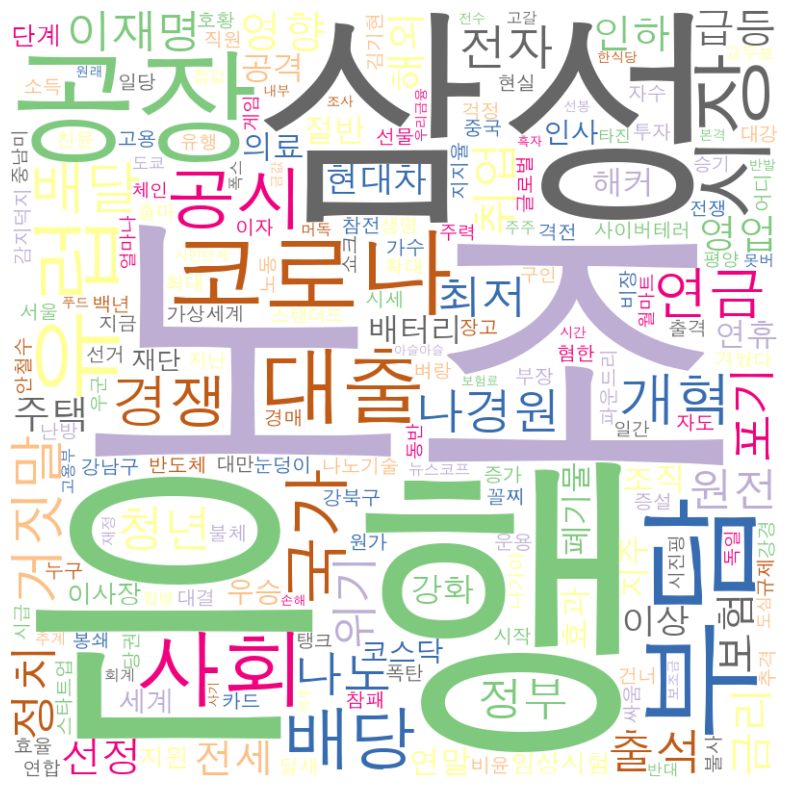

In [145]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)


fig = plt.figure(figsize=(10,10))

#def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    #return("hsl(0,0%%, %d%%)" % np.random.randint(1,100))

plt.imshow(
    array,
    #wordcloud_words.recolor(color_func = grey_color_func),
    interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig(''+str(day)+' ''매경워드클라우드.png')

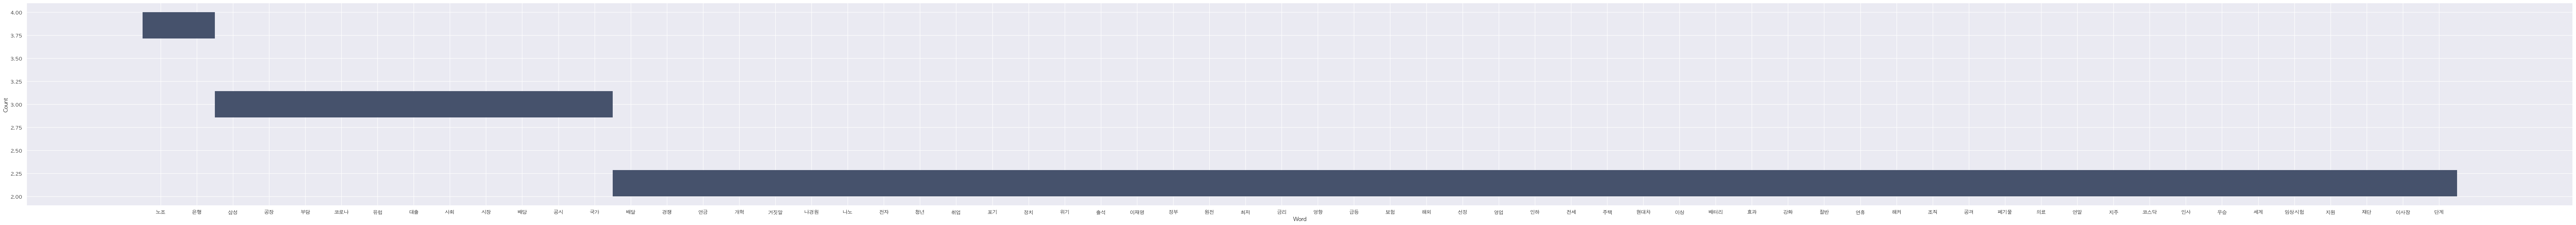

In [209]:

sns.set(font="AppleGothic")
fig=sns.histplot(data=df, x="Word",y="Count" )
plt.figure(figsize=(16,10))

plt.show()
plt.savefig('test.png')